<a href="https://colab.research.google.com/github/Anna72/other/blob/master/Lab2_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Лабораторная работа 2. Проверки статистических гипотез. 
1. Задайте параметры закона. Задайте объем выборки n (четное). Постройте выборку объема n из закона P с заданными параметрами. 
2. Сгенерируйсте выборку объема n из U[−δ,δ] с очень малым δ > 0 и сложите ее с исходной (покоординатно). 

In [ ]:
from scipy.stats import uniform
import matplotlib.pyplot as plt
import numpy as np
a = 0  # left border
b = 1  # right border
sigm = 0.2
n = 1000   # объем выборки 
ru = np.random.uniform(a,b,n)  # выборка
vr = np.copy(ru)
vr.sort()
rus = np.random.uniform(-sigm,sigm,n)
new_r = ru + rus
new_vr = np.copy(new_r)
new_vr.sort()
new_vr

array([-1.76467559e-01, -1.68245676e-01, -1.62874664e-01, -1.52414604e-01,
       -1.52171317e-01, -1.44422480e-01, -1.42790713e-01, -1.35704239e-01,
       -1.31441191e-01, -1.28350963e-01, -1.23735816e-01, -1.18542390e-01,
       -1.17688104e-01, -1.17032710e-01, -1.12947908e-01, -1.08025313e-01,
       -1.01489036e-01, -9.78515328e-02, -8.82563823e-02, -8.55855426e-02,
       -8.37405381e-02, -7.89871960e-02, -7.40686295e-02, -7.32433956e-02,
       -7.04582347e-02, -6.75897699e-02, -6.50809406e-02, -6.46434587e-02,
       -6.41032037e-02, -6.38858014e-02, -6.18351892e-02, -6.01100035e-02,
       -5.80304745e-02, -5.57036727e-02, -4.84342358e-02, -4.68107459e-02,
       -4.44040504e-02, -4.18113513e-02, -4.14816333e-02, -3.77759169e-02,
       -3.37050774e-02, -3.34162058e-02, -3.14721212e-02, -2.33117376e-02,
       -2.29829130e-02, -1.94485403e-02, -1.85894561e-02, -1.81841892e-02,
       -1.66534944e-02, -1.64192305e-02, -1.45516307e-02, -1.19786443e-02,
       -1.13282871e-02, -

3. С помощью критерия Колмогорова проверить гипотезу о принадлежности получившейся выборки к закону P c заданным уровнем значимости. 


In [ ]:
import statsmodels as sm
import math
import statsmodels.distributions
gamma = 0.95
Kgamma = 1.35
x1 = np.linspace(0,1)
F0 = uniform.cdf(x1,a,b)
ecd = sm.distributions.ECDF(new_vr)
Fn = ecd(x1)
Dn = max(abs(Fn - F0))
print(math.sqrt(n)*Dn, Kgamma)
if math.sqrt(n)*Dn < Kgamma:
  print ("Uniform(",a,",",b,")")
else:
  print ("Not Uniform(",a,",",b,")")

1.8024982662959763 1.35
Not Uniform( 0 , 1 )


4. Разделите выборку на две выборки одинакового объема n/2. Проверьте по критерию Спирмена (асимптотическая версия с нормальным законом) гипотезу независимости этих двух выборок c заданным уровнем значимости. 


In [ ]:
r1 = np.array([0.0]*(n//2))
r2 = np.array([0.0]*(n//2))

for i in range(0, n):
  if i < n//2:
    r1[i] = new_r[i]
  else:
    r2[i-n//2] = new_r[i]

r11 = np.copy(r1)
r22 = np.copy(r2)
rang1 = np.copy(r1)
rang2 = np.copy(r2)

r1.sort() 
r2.sort()
for i in range(0, n//2):
  for j in range(0, n//2):
    if r1[i] == rang1[j]:
      rang1[j] = i
      j = n//2 - 1
    if r2[i] == rang2[j]:
      rang2[j] = i
      j = n//2 - 1

z = 1.645
mid = (n//2 + 1) /2
print(mid)
summ = 0
for i in range(0, n//2):
  summ += (rang1[i] - mid)*(rang2[i] - mid)
summ *= 12/(n//2*(n**2//4 - 1))
print (summ, " коэффициент корреляции спирмена")
print(abs(math.sqrt(n//2)*summ)," <= ", z)


250.5
-0.008118734278824877  коэффициент корреляции спирмена
0.18154041738710158  <=  1.645


5. Для этих же двух выборок проверьте по критерию Смирнова гипотезу однородности c заданным уровнем значимости.



0.061999999999999944
0.9803060746521967 1.35
[0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
 0.    0.    0.006 0.02  0.042 0.076 0.116 0.164 0.214 0.252 0.3   0.356
 0.426 0.484 0.534 0.618 0.694 0.762 0.822 0.89  0.928 0.962 0.98  0.996
 1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.
 1.    1.   ]
[0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
 0.    0.    0.006 0.022 0.048 0.082 0.116 0.164 0.232 0.298 0.328 0.384
 0.448 0.516 0.596 0.66  0.726 0.772 0.834 0.892 0.924 0.958 0.976 0.998
 1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.
 1.    1.   ]


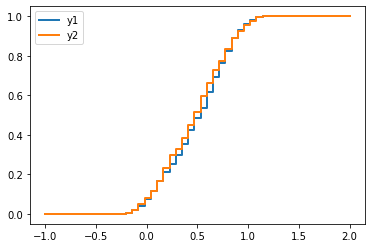

In [ ]:
x = np.linspace(-1,2)
ecdf1 = sm.distributions.ECDF(r1)
y1 = ecdf1(x)
ecdf2 = sm.distributions.ECDF(r2)
y2 = ecdf2(x)
D = max(abs(y1 - y2))
print(D)
print(math.sqrt(n/4)*D, Kgamma)
print(y1)
print(y2)
plt.step(x, y1, lw=2, label = "y1")
plt.step(x, y2, lw=2, label = "y2")
plt.legend()
plt.show()

Лабораторная работа 3. Оценка параметров общей линейной модели. 

1. Задайте параметры закона. Задайте объем выборки n. Постройте выборку объема n из закона P с заданными параметрами. 

2.Задайтепараметры θ0, θ1 и θ2.Каждыйэлементвыборки Xk преобразуйте: θ2X2 k+θ1Xk+θ0, k = 1,...,n. Сгенерируйсте выборку объема n из U[−δ,δ] с очень малым δ > 0 и сложите ее с преобразованной выборкой (покоординатно). Обозначим полученную выборку Y. 

3. Найдите выборочные оценки ˆ θ0, ˆ θ1 и ˆ θ2 для параметров θ0, θ1 и θ2, соответственно, по методу наименьших квадратов и сравните их с настоящими значениями. 

4. Изобразите в одной системе координат множество точек (Xk,Yk), график y = θ2x2 +θ1x+θ0 и график y = ˆ θ2x2 + ˆ θ1x + ˆ θ0.


In [ ]:
from scipy.stats import uniform
import matplotlib.pyplot as plt
import numpy as np
a = 0  # left border
b = 1  # right border
n = 10   # объем выборки 
sigm = 0.02
r = np.random.uniform(a,b,n)  # выборка
sigmr = np.random.uniform(-sigm,sigm,n)
t0 = 0.5
t1 = 0.4
t2 = -0.7
newr = np.copy(r)
for i in range (0,n):
  newr[i] = newr[i]*newr[i]*t2 + newr[i]*t1 + t0 + sigmr[i]
newr  


array([0.55622442, 0.32770908, 0.20913461, 0.48975077, 0.52080939,
       0.54302087, 0.53130821, 0.54017783, 0.50541077, 0.24829384])

In [ ]:
r

array([0.45465559, 0.84962311, 0.99690506, 0.59673656, 0.44582724,
       0.14262637, 0.53131031, 0.32495863, 0.03691626, 0.93355708])

In [ ]:
A = np.array([[0.0]*3]*n)
for i in range (0, n):
  A[i][0] = r[i]**2
  A[i][1] = r[i]
  A[i][2] = 1

AT = A.transpose()
B = AT.dot(A)
B1 = np.linalg.inv(B)
Tet = B1.dot(AT).dot(newr)


A

array([[0.2067117 , 0.45465559, 1.        ],
       [0.72185943, 0.84962311, 1.        ],
       [0.9938197 , 0.99690506, 1.        ],
       [0.35609452, 0.59673656, 1.        ],
       [0.19876193, 0.44582724, 1.        ],
       [0.02034228, 0.14262637, 1.        ],
       [0.28229065, 0.53131031, 1.        ],
       [0.10559811, 0.32495863, 1.        ],
       [0.00136281, 0.03691626, 1.        ],
       [0.87152882, 0.93355708, 1.        ]])

In [ ]:
Tet

array([-0.73048642,  0.43489858,  0.49066113])

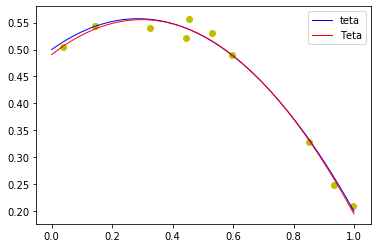

In [ ]:
x = np.linspace(0,1,5000)
plt.plot(x, t2*x**2 + t1*x + t0, lw=1, color= "b", label = "teta")
plt.plot(x, Tet[0]*x**2 + Tet[1]*x + Tet[2], lw=1, color= "r", label = "Teta")
plt.scatter(r,newr, lw = 1,color = "y")
plt.legend()
plt.show()

